In [31]:

import sys
import numpy
import sklearn
import pandas

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))

Python: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Numpy: 1.23.5
Sklearn: 1.2.2
Pandas: 1.5.3


In [32]:
import pandas as pd
import re
import numpy as np
import itertools
import collections
from collections import defaultdict, Counter
import string


import nltk
nltk.download('treebank')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

import gensim
from gensim.models import KeyedVectors, Word2Vec, FastText

import tensorflow as tf

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\I.V.SRICHANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I.V.SRICHANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\I.V.SRICHANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\I.V.SRICHANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\I.V.SRICHANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [33]:
# Import, change module names
import numpy as np
import pandas as pd

# import the uci Molecular Biology (Promoter Gene Sequences) Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)



In [34]:
print(data.iloc[:5])


  Class         id                                           Sequence
0     +        S10  \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1     +       AMPC  \t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2     +       AROH  \t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3     +      DEOP2  \taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4     +  LEU1_TRNA  \ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [35]:
print(data['Sequence'][0])
print(len(data['Sequence'][0]))

		tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt
59


In [36]:
# preprocessing the data

# Preprocess data function
def preprocess_data(text):
    user_name = '@[A-Za-z0-9]+'  # Pattern for matching the user names in the tweet
    has_tag = '#[A-Za-z0-9]+'  # Pattern for matching the hashtags in the tweet
    url = 'https?:\/\/[A-Za-z0-9\.\/\-]+'  # Pattern for matching the URLs in the tweet

    x = text.lower()  # Lower casing all the characters
    x = re.sub(user_name, '', x)  # Replace the username with an empty character
    x = re.sub(has_tag, '', x)  # Replace the hashtags with an empty character
    x = re.sub(url, '', x)  # Replace the URLs with an empty character
    x = x.translate(str.maketrans('', '', string.punctuation))  # Replace all the characters except alphabets and digits from the tweet

    return x


# Preprocess the data
data['Sequence'] = data['Sequence'].apply(preprocess_data)
print(data.iloc[:5])

  Class         id                                           Sequence
0     +        S10  \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1     +       AMPC  \t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2     +       AROH  \t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3     +      DEOP2  \taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4     +  LEU1_TRNA  \ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


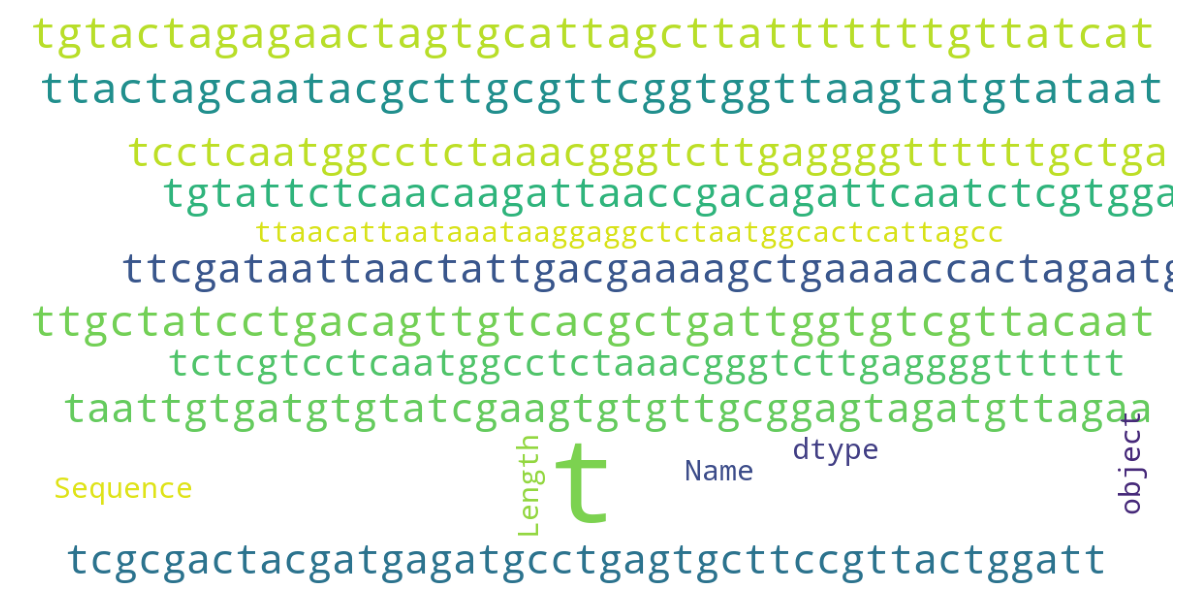

In [37]:
# applying the wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['Sequence'])

In [38]:
# tokenization
from nltk.tokenize import word_tokenize

tokenized_sents = [word_tokenize(i) for i in data["Sequence"]]
print(tokenized_sents)

flattened = []
for sublist in tokenized_sents:
    for val in sublist:
        flattened.append(val)
print(flattened)

Vocab=[]
for item in flattened:
    if not item in Vocab:
        Vocab.append(item)
print(Vocab)


[['tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt'], ['tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa'], ['gtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg'], ['aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc'], ['tcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag'], ['aggggcaaggaggatggaaagaggttgccgtataaagaaactagagtccgtttaggt'], ['cagggggtggaggatttaagccatctcctgatgacgcatagtcagcccatcatgaat'], ['tttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca'], ['cgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaatgaaatggttt'], ['ttttaaatttcctcttgtcaggccggaataactccctataatgcgccaccactgaca'], ['gcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg'], ['cctgaaattcagggttgactctgaaagaggaaagcgtaatatacgccacctcgcgac'], ['gatcaaaaaaatacttgtgcaaaaaattgggatccctataatgcgcctccgttgaga'], ['ctgcaatttttctattgcggcctgcggagaactccctataatgcgcctccatcgaca'], ['tttatatttttcgcttgtcaggccggaataactccctataatgcgccaccactgaca'], ['aagcaaagaaatgcttgactctgtagcgggaaggcgtattatgcacaccgcc

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Class']=le.fit_transform(data['Class'])
print(data['Class'])
train_label=data['Class']


0      0
1      0
2      0
3      0
4      0
      ..
101    1
102    1
103    1
104    1
105    1
Name: Class, Length: 106, dtype: int32


In [40]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_sents)

temp1 = tokenizer.texts_to_sequences(tokenized_sents)
temp_pad=tf.keras.preprocessing.sequence.pad_sequences(temp1, padding='post')
training_labels = tf.keras.utils.to_categorical(train_label)


In [41]:
# model building
METRICS = [

      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [42]:
filter_size = 128
kernel_size = 5
pool_size = 5
vocab_size=len(Vocab)+1
embedding_dim = 100
max_length= len(temp_pad[0])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filter_size, kernel_size, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size, padding='same'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=METRICS
)

model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1, 100)            10700     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            64128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                

In [43]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

num_epochs = 100
history = model.fit(
    temp_pad, 
    training_labels, 
    epochs=num_epochs, 
    batch_size = 32,
    callbacks=[callback],
    #validation_data=(valid_padded, validation_labels)
    validation_split=0.1
)

Epoch 1/100
3/3 [==============================] - 5s 518ms/step - loss: 0.6925 - accuracy: 0.5368 - precision: 0.5368 - recall: 0.5368 - auc: 0.5638 - val_loss: 0.7863 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6746 - accuracy: 0.5579 - precision: 0.5579 - recall: 0.5579 - auc: 0.6260 - val_loss: 0.9018 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.4984 - accuracy: 0.6632 - precision: 0.6632 - recall: 0.6632 - auc: 0.8394 - val_loss: 1.1422 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1914 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.8505 - val_accuracy: 0.000

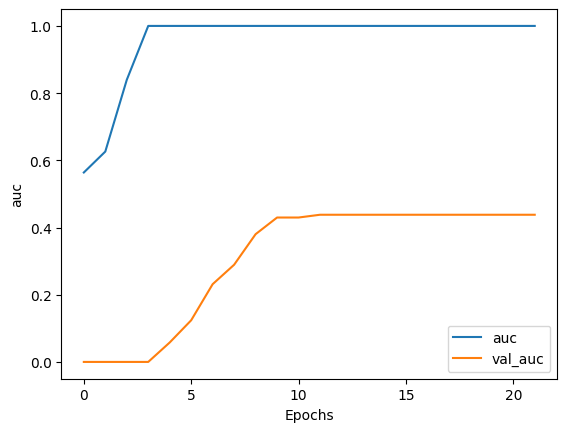

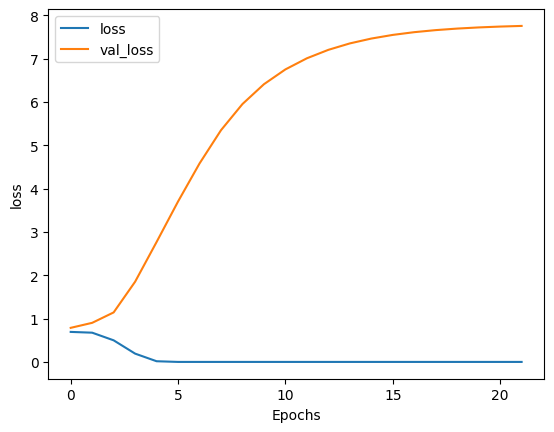

In [44]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "auc")
plot_graphs(history, "loss")

In [49]:
# model evaluation
test_loss, test_acc, test_prec, test_rec, test_auc = model.evaluate(temp_pad, training_labels)

print('Test Loss: {}'.format(test_loss))

print('Test Accuracy: {}'.format(test_acc))

print('Test Precision: {}'.format(test_prec))

print('Test Recall: {}'.format(test_rec))

print('Test AUC: {}'.format(test_auc))

# model prediction
predictions = model.predict(temp_pad)



# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(training_labels, axis=1)
cm = confusion_matrix(y_true, y_pred)
print('------------confusion_matrix------------')
print(cm)



4/4 [==============================] - 0s 6ms/step - loss: 0.7270 - accuracy: 0.9434 - precision: 0.9434 - recall: 0.9434 - auc: 0.9517
Test Loss: 0.726980984210968
Test Accuracy: 0.9433962106704712
Test Precision: 0.9433962106704712
Test Recall: 0.9433962106704712
Test AUC: 0.9516732096672058
4/4 [==============================] - 0s 2ms/step
------------confusion_matrix------------
[[53  0]
 [ 6 47]]
